# Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None) # display all columns for the dataframes

In [14]:
df = pd.read_csv('data.csv', delimiter='}', encoding = "utf-16")
df.head()

,target,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,0.0,0.6,3.848024360038754,-0.12489928599664912,-0.876288,a,0.0,1.0,0.0,-1.4022953844807486,996.8002935258253,2019-07-03,qq,q
1,0.0,-9999.0,3.686711750399645,2.7465579865302554,-16840.562852,fr,0.0,_,0.0,-3.0501812364863525,998.0628287070417,2019-04-12,cc,r
2,1.0,0.6,1.7903405757001267,-0.3791833083216618,1.115662,w,1.0,4.0,inf,inf,997.5618023143123,2019-09-30,aa,t
3,0.0,0.3,2.1368573082176185,1.8436547163343175,-2.593336,w,0.0,1.0,0.0,-0.8521568609928067,998.0647328947183,2019-06-11,dd,u
4,0.0,0.3,3.3008362240888207,1.492122687471352,-3.033777,f,0.0,3.0,0.0,-0.8116829603342575,1000.64857852335,2019-06-18,_,y


In [15]:
# Dataframe size 
print("Rows count:", df.shape[0], "Columns count:", df.shape[1])

Rows count: 1000000 Columns count: 14


# Rename missing values & convert numeric data types

In [16]:
df = df.replace('_', np.nan)

In [17]:
# Convert data to numeric
numeric_columns = ['c1', 'c2', 'c3', 'c4', 'c6', 'c7', 'c8', 'c9', 'c10']
df[numeric_columns] = df[numeric_columns].astype(float)
df.head()

,target,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,0.0,0.6,3.848024,-0.124899,-0.876288,a,0.0,1.0,0.0,-1.402295,996.800294,2019-07-03,qq,q
1,0.0,-9999.0,3.686712,2.746558,-16840.562852,fr,0.0,NaN,0.0,-3.050181,998.062829,2019-04-12,cc,r
2,1.0,0.6,1.790341,-0.379183,1.115662,w,1.0,4.0,inf,inf,997.561802,2019-09-30,aa,t
3,0.0,0.3,2.136857,1.843655,-2.593336,w,0.0,1.0,0.0,-0.852157,998.064733,2019-06-11,dd,u
4,0.0,0.3,3.300836,1.492123,-3.033777,f,0.0,3.0,0.0,-0.811683,1000.648579,2019-06-18,NaN,y


# Target column - drop missing data

In [18]:
def checkColumn(col):
    print(df[col].value_counts(dropna=False)) # check values
    df[col].hist()
    plt.show()

0.0    700383
1.0    200486
NaN     99131
Name: target, dtype: int64


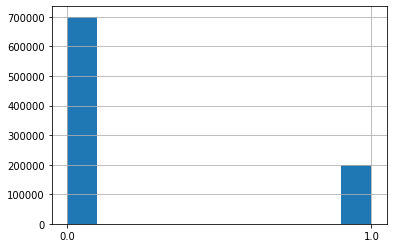

In [19]:
col = 'target'
checkColumn(col)

In [20]:
# Drop rows with target = Nan
df.dropna(subset=['target'], inplace=True)

0.0    700383
1.0    200486
Name: target, dtype: int64


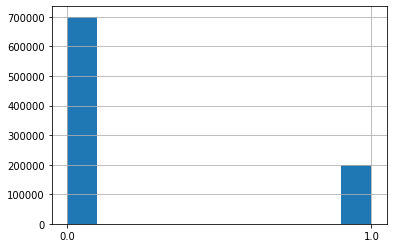

In [21]:
checkColumn(col)

In [24]:
df[col] = df[col].apply(float).apply(int)

# Numeric columns

In [26]:
def clearInf(col):
    print(df[col].value_counts(dropna=False)) # check values
    m = df[col][df[col]!=-np.inf].min()
    M = df[col][df[col]!=np.inf].max()
    df[col] = df[col].replace(-np.inf, m)
    df[col] = df[col].replace(np.inf, M)
    df[col] = df[col].fillna(df[col].mean())
    checkColumn(col)
    plt.show()
def clearNan(col):
    print(df[col].value_counts(dropna=False)) # check values
    df[col] = df[col].fillna(df[col].mean())
    checkColumn(col)
    plt.show()
def normalize(col):
    m = df[col].min()
    M = df[col].max()
    df[col] = (df[col] - m) / (M - m)
    df[col].hist()
    plt.show()

## c1 - clear missing values

 0.3       90560
 0.7       90414
 0.2       90184
 0.8       90157
-9999.0    90075
 0.5       90072
 0.6       90064
 0.4       89965
 0.1       89694
 0.9       89684
Name: c1, dtype: int64


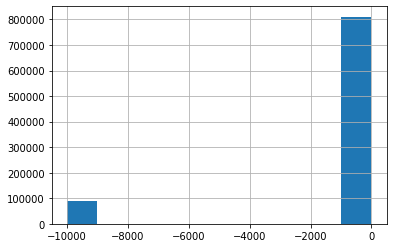

In [27]:
col = 'c1'
checkColumn(col)

In [28]:
df[col] = df[col].replace(-9999, np.nan) # for using fillna

In [29]:
df[col].fillna(df[col].mean())

0         0.600000
1         0.499961
2         0.600000
3         0.300000
4         0.300000
            ...   
999995    0.200000
999996    0.100000
999997    0.500000
999998    0.900000
999999    0.300000
Name: c1, Length: 900869, dtype: float64

## c2, c3, c8, c9 - clear missing values (inf, -inf)

In [30]:
cols = ['c2', 'c3', 'c8', 'c9']

 inf         53705
-inf         18168
 NaN         18067
 3.848024        1
 2.377580        1
             ...  
 1.601767        1
 3.378654        1
 2.746859        1
 3.846122        1
 1.848712        1
Name: c2, Length: 810932, dtype: int64
3.999997    53706
1.000007    18169
2.559683    18067
3.848024        1
2.196534        1
            ...  
1.601767        1
3.378654        1
2.746859        1
3.846122        1
1.848712        1
Name: c2, Length: 810930, dtype: int64


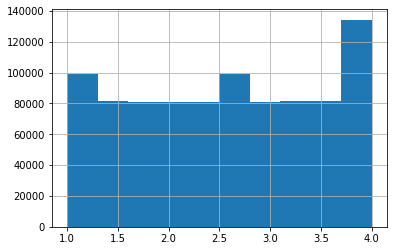

 inf         53705
-inf         18168
 NaN         18067
-0.124899        1
 2.126978        1
             ...  
-2.939322        1
 1.718811        1
 1.219249        1
 0.433049        1
-0.319606        1
Name: c3, Length: 810932, dtype: int64
 4.983165    53706
-2.993001    18169
 1.159543    18067
-0.124899        1
 2.126978        1
             ...  
 2.775992        1
-2.939322        1
 1.718811        1
 1.219249        1
-0.319606        1
Name: c3, Length: 810930, dtype: int64


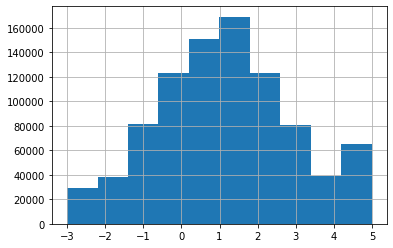

 0.0    410271
 1.0    210522
-1.0     99912
 NaN     90217
-inf     69785
 inf     20162
Name: c8, dtype: int64
 0.000000    410271
 1.000000    230684
-1.000000    169697
 0.075232     90217
Name: c8, dtype: int64


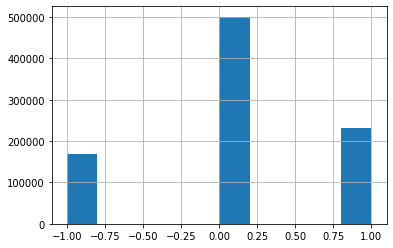

 NaN         90217
-inf         69785
 inf         20162
-1.402295        1
-2.611484        1
             ...  
-0.219669        1
 0.755339        1
-4.067227        1
-0.983552        1
-1.891390        1
Name: c9, Length: 720708, dtype: int64
-1.107761    90217
-4.984938    69786
 2.987633    20163
-1.402295        1
-2.611484        1
             ...  
-0.219669        1
 0.755339        1
-4.067227        1
-0.983552        1
-1.891390        1
Name: c9, Length: 720706, dtype: int64


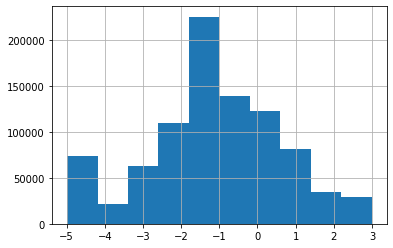

In [31]:
for col in cols:
    clearInf(col)

## c6, c7, c10 - clear missing values (Nan)

0.0    530414
1.0    290444
NaN     80011
Name: c6, dtype: int64
0.00000    530414
1.00000    290444
0.35383     80011
Name: c6, dtype: int64


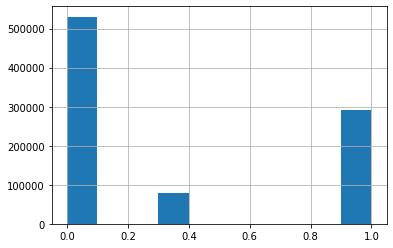

4.0    219997
1.0    200601
NaN    200260
3.0    140451
2.0    139560
Name: c7, dtype: int64
4.000000    219997
1.000000    200601
2.542163    200260
3.000000    140451
2.000000    139560
Name: c7, dtype: int64


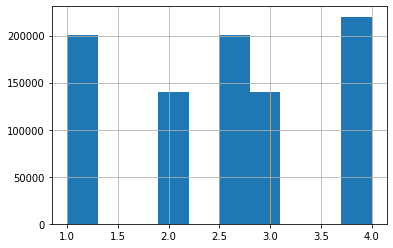

996.800294     1
999.893508     1
995.692839     1
1000.626000    1
1000.229435    1
              ..
997.038983     1
998.787805     1
996.980483     1
997.093210     1
999.692560     1
Name: c10, Length: 900869, dtype: int64
996.800294     1
999.893508     1
995.692839     1
1000.626000    1
1000.229435    1
              ..
997.038983     1
998.787805     1
996.980483     1
997.093210     1
999.692560     1
Name: c10, Length: 900869, dtype: int64


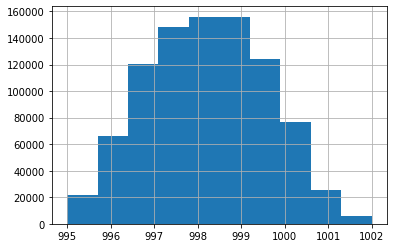

In [32]:
cols = ['c6', 'c7', 'c10']
for col in cols:
    clearNan(col)

## c10

996.800294     1
999.893508     1
995.692839     1
1000.626000    1
1000.229435    1
              ..
997.038983     1
998.787805     1
996.980483     1
997.093210     1
999.692560     1
Name: c10, Length: 900869, dtype: int64


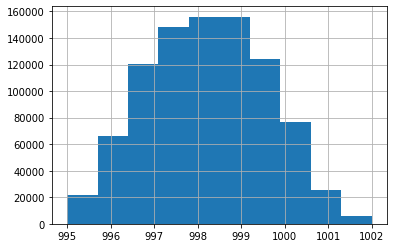

In [33]:
col = 'c10'
checkColumn(col) # values are great distributed but it can be normalized

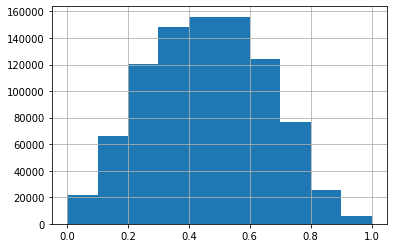

In [34]:
normalize(col)

# Correlation with target

In [35]:
df.corrwith(df["target"])

target    1.000000
c1       -0.000579
c2        0.000464
c3       -0.000459
c4       -0.000398
c6        0.486502
c7        0.058637
c8       -0.375717
c9       -0.000401
c10       0.307215
dtype: float64

In [36]:
# We can drop columns that have unsignificant correlation with target columns. So let's leave only c6, c8, c10, others will be dropped
# drop columns
drop_elements = ['c1', 'c2', 'c3', 'c4', 'c7', 'c9']
df = df.drop(drop_elements, axis=1)
df.head()

,target,c5,c6,c8,c10,c11,c12,c13
0,0,a,0.0,0.0,0.257071,2019-07-03,qq,q
1,0,fr,0.0,0.0,0.437672,2019-04-12,cc,r
2,1,w,1.0,1.0,0.366002,2019-09-30,aa,t
3,0,w,0.0,0.0,0.437944,2019-06-11,dd,u
4,0,f,0.0,0.0,0.807554,2019-06-18,NaN,y


# Categorical columns

In [38]:
df['c12'] = df['c12'].fillna('_')

In [39]:
from scipy.stats import spearmanr
def checkCategoricalData(col):
    print(col)
    checkColumn(col)
    # Spearman correlation coef in range [-1;1] and p-value for significant interpretation 
    coef, p = spearmanr(df[col], df['target']) # calculation is quite slow
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)

c5
f     125574
fr    125210
w     125087
d     125071
qw    124944
a     124930
ew    124852
sd    124332
Name: c5, dtype: int64


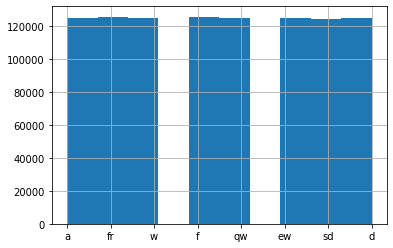

Spearmans correlation coefficient: -0.001
Samples are uncorrelated (fail to reject H0) p=0.550
c12
dd     142019
yy     115157
ee     114938
_      114863
aa     114841
qq     114560
ww     114305
cc     114295
rr      27622
tty     27400
Name: c12, dtype: int64


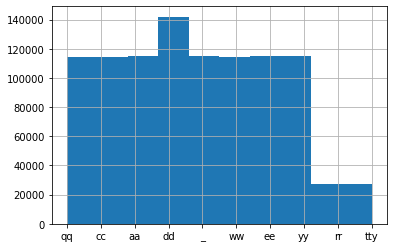

Spearmans correlation coefficient: 0.048
Samples are correlated (reject H0) p=0.000
c13
y    100426
r    100261
i    100118
w    100080
e     99982
u     99951
t     99903
p     99791
o     99746
q     99742
Name: c13, dtype: int64


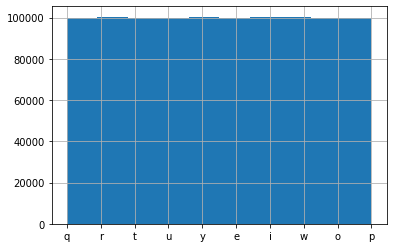

Spearmans correlation coefficient: 0.001
Samples are uncorrelated (fail to reject H0) p=0.193


In [35]:
cols = ['c5', 'c12', 'c13']
for col in cols:
    checkCategoricalData(col)

In [40]:
# Results: Only column c12 is significant
# drop columns
drop_elements = ['c5', 'c13']
df = df.drop(drop_elements, axis=1)
df.head()

,target,c6,c8,c10,c11,c12
0,0,0.0,0.0,0.257071,2019-07-03,qq
1,0,0.0,0.0,0.437672,2019-04-12,cc
2,1,1.0,1.0,0.366002,2019-09-30,aa
3,0,0.0,0.0,0.437944,2019-06-11,dd
4,0,0.0,0.0,0.807554,2019-06-18,_


## c12

In [41]:
# For correlation
col = 'c12'
df[[col, 'target']].groupby([col], as_index = False).agg({'target': ['mean', 'count']})

c12    target        
            mean   count
0    _  0.173855  105686
1   aa  0.171021  106022
2   cc  0.171186  105219
3   dd  0.293139  124115
4   ee  0.172259  105928
5   qq  0.172358  105664
6   rr  1.000000   18520
7  tty  1.000000   18235
8   ww  0.170621  105339
9   yy  0.173335  106141

In [42]:
# We might use one-hot encoding or label encoding but it seems that data have some redundancies. We can create 3 groups: ['dd'] - 0.5, ['rr', 'tty'] - 1, [others] - 0
df['c12_modified'] = df[col].map({'dd': 0.5, 'rr': 1, 'tty': 1})
df['c12_modified'] = df['c12_modified'].fillna(0)

In [43]:
col = 'c12_modified'
df[[col, 'target']].groupby([col], as_index = False).agg({'target': ['mean', 'count']})

c12_modified    target        
                    mean   count
0          0.0  0.172092  739999
1          0.5  0.293139  124115
2          1.0  1.000000   36755

In [44]:
df.corrwith(df["target"])

target          1.000000
c6              0.486502
c8             -0.375717
c10             0.307215
c12_modified    0.349805
dtype: float64

In [45]:
drop_elements = ['c12']
df = df.drop(drop_elements, axis=1)
df.head()

,target,c6,c8,c10,c11,c12_modified
0,0,0.0,0.0,0.257071,2019-07-03,0.0
1,0,0.0,0.0,0.437672,2019-04-12,0.0
2,1,1.0,1.0,0.366002,2019-09-30,0.0
3,0,0.0,0.0,0.437944,2019-06-11,0.5
4,0,0.0,0.0,0.807554,2019-06-18,0.0


# DateTime column

In [46]:
col = 'c11'
df[col] = pd.to_datetime(df[col]) # change column to datetime type

In [47]:
df[col].isnull().sum() # There are no so many missing dates, we can just drop this rows

3096

In [48]:
df.dropna(subset=[col], inplace=True)

In [49]:
df[col].describe() # since all dates in 2019, year is insignificant

count                  897773
unique                    366
top       2019-08-03 00:00:00
freq                     3348
first     2019-01-01 00:00:00
last      2020-01-01 00:00:00
Name: c11, dtype: object

In [50]:
# Generate columns based on date: since start datetime, month number, week day number, is weekend
df['c11_since'] = (df[col] - df[col].min()).dt.days # days since the start of the observation
df['c11_month'] = df[col].dt.month
df['c11_week_day'] = df[col].dt.weekday
df['c11_weekend'] = 0
df.loc[df['c11_week_day'].isin([5, 6]), 'c11_weekend'] = 1

In [51]:
# Generate columns based on date: Is Holiday and Is Holiday or weekend
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df[col].min(), end=df[col].max())

df['c11_isholiday'] = df[col].isin(holidays).replace({True: 1, False: 0})
df['c11_isholiday_weekend'] = 0
df.loc[(df['c11_isholiday'] == 1) | (df['c11_weekend'] == 1), 'c11_isholiday_weekend'] = 1
df.head()

,target,c6,c8,c10,c11,c12_modified,c11_since,c11_month,c11_week_day,c11_weekend,c11_isholiday,c11_isholiday_weekend
0,0,0.0,0.0,0.257071,2019-07-03,0.0,183,7,2,0,0,0
1,0,0.0,0.0,0.437672,2019-04-12,0.0,101,4,4,0,0,0
2,1,1.0,1.0,0.366002,2019-09-30,0.0,272,9,0,0,0,0
3,0,0.0,0.0,0.437944,2019-06-11,0.5,161,6,1,0,0,0
4,0,0.0,0.0,0.807554,2019-06-18,0.0,168,6,1,0,0,0


In [52]:
# Check correcation with target column
df.corrwith(df["target"])

target                   1.000000
c6                       0.486178
c8                      -0.375578
c10                      0.306946
c12_modified             0.349710
c11_since                0.001758
c11_month                0.005894
c11_week_day             0.129179
c11_weekend              0.329523
c11_isholiday            0.020112
c11_isholiday_weekend    0.331651
dtype: float64

In [53]:
# We get that c11_since, c11_month, c11_isholiday are quite unsignificant
# drop columns
drop_elements = ['c11_since', 'c11_month', 'c11_isholiday', 'c11']
df = df.drop(drop_elements, axis=1)
df.head()

,target,c6,c8,c10,c12_modified,c11_week_day,c11_weekend,c11_isholiday_weekend
0,0,0.0,0.0,0.257071,0.0,2,0,0
1,0,0.0,0.0,0.437672,0.0,4,0,0
2,1,1.0,1.0,0.366002,0.0,0,0,0
3,0,0.0,0.0,0.437944,0.5,1,0,0
4,0,0.0,0.0,0.807554,0.0,1,0,0


# Check data

In [54]:
df.dtypes # All columns are numeric

target                     int64
c6                       float64
c8                       float64
c10                      float64
c12_modified             float64
c11_week_day               int64
c11_weekend                int64
c11_isholiday_weekend      int64
dtype: object

In [55]:
df.isnull().sum() # No missing values

target                   0
c6                       0
c8                       0
c10                      0
c12_modified             0
c11_week_day             0
c11_weekend              0
c11_isholiday_weekend    0
dtype: int64

# Save data

In [71]:
df.to_csv('data_processed.csv', index=False)

In [3]:
import pandas as pd
df1 = pd.read_csv('data_processed.csv')
df1.head()

,target,c6,c8,c10,c12_modified,c11_week_day,c11_weekend,c11_isholiday_weekend
0,0,0.0,0.0,0.257071,0.0,2,0,0
1,0,0.0,0.0,0.437672,0.0,4,0,0
2,1,1.0,1.0,0.366002,0.0,0,0,0
3,0,0.0,0.0,0.437944,0.5,1,0,0
4,0,0.0,0.0,0.807554,0.0,1,0,0


In [4]:
df = df1

# Some simple models

In [10]:
# Just for the sake of checking that our cleaning is not bad
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [6]:
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split data

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.8691041742084598


In [49]:
imps = permutation_importance(model, X_test, y_test)
print(imps.importances_mean)

[ 0.05742864  0.02061652  0.01467851  0.0498655  -0.00334828 -0.0041458
 -0.00342291]


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9033889337528891


In [11]:
imps = permutation_importance(model, X_test, y_test)
print(imps.importances_mean)

[0.06724291 0.03684665 0.02358609 0.02179277 0.11465122 0.20305756
 0.00092339]
